In [3]:
import pandas as pd

driver_grid = pd.read_csv("../data/driverGrid.csv")
circuits = pd.read_csv("../data/circuits.csv")

In [ ]:
!python -m pip install pandas


[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
import pandas as pd
pd.__version__



'2.3.3'

In [ ]:
import pandas as pd

driver_grid = pd.read_csv("../data/driverGrid.csv")
circuits = pd.read_csv("../data/circuits.csv")

driver_grid.head()


,raceId,driverId,points,position,wins
0,18,1,10.0,1,1
1,18,2,8.0,2,0
2,18,3,6.0,3,0
3,18,4,5.0,4,0
4,18,5,4.0,5,0


In [65]:
circuits.head()


,raceId,circuit_name,circuit_country,year,race_round
0,1,Albert Park Grand Prix Circuit,Australia,2009,1
1,18,Albert Park Grand Prix Circuit,Australia,2008,1
2,36,Albert Park Grand Prix Circuit,Australia,2007,1
3,55,Albert Park Grand Prix Circuit,Australia,2006,3
4,71,Albert Park Grand Prix Circuit,Australia,2005,1


In [ ]:
driver_grid = driver_grid[
    ["raceId", "driverId", "points", "position", "wins"]
]

circuits = circuits[
    ["raceId", "circuit_name", "circuit_country", "year", "race_round"]
]


In [93]:
merged_df = pd.merge(
    driver_grid,
    circuits,
    on="raceId",
    how="inner"
)


In [ ]:
merged_df.head()


,raceId,driverId,points,position,wins,circuit_name,circuit_country,year,race_round
0,18,1,10.0,1,1,Albert Park Grand Prix Circuit,Australia,2008,1
1,18,2,8.0,2,0,Albert Park Grand Prix Circuit,Australia,2008,1
2,18,3,6.0,3,0,Albert Park Grand Prix Circuit,Australia,2008,1
3,18,4,5.0,4,0,Albert Park Grand Prix Circuit,Australia,2008,1
4,18,5,4.0,5,0,Albert Park Grand Prix Circuit,Australia,2008,1


In [119]:
merged_df.shape
merged_df.isnull().sum()


raceId             0
driverId           0
points             0
position           0
wins               0
circuit_name       0
circuit_country    0
year               0
race_round         0
good_race          0
dtype: int64

In [ ]:
merged_df.to_csv("../data/f1_strategy_base.csv", index=False)


In [143]:
merged_df["good_race"] = (merged_df["position"] <= 5).astype(int)


In [ ]:
merged_df[["position", "good_race"]].head(10)


,position,good_race
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,6,0
6,7,0
7,8,0
8,1,1
9,3,1


In [ ]:
merged_df["good_race"].value_counts()


good_race
0    28240
1     5320
Name: count, dtype: int64

In [165]:
merged_df.to_csv("../data/f1_strategy_with_target.csv", index=False)


In [ ]:
features = [
    "circuit_name",
    "circuit_country",
    "year",
    "race_round",
    "driverId"
]

X = merged_df[features]
y = merged_df["good_race"]


In [184]:
X.head(), y.head()


(                     circuit_name circuit_country  year  race_round  driverId
 0  Albert Park Grand Prix Circuit       Australia  2008           1         1
 1  Albert Park Grand Prix Circuit       Australia  2008           1         2
 2  Albert Park Grand Prix Circuit       Australia  2008           1         3
 3  Albert Park Grand Prix Circuit       Australia  2008           1         4
 4  Albert Park Grand Prix Circuit       Australia  2008           1         5,
 0    1
 1    1
 2    1
 3    1
 4    1
 Name: good_race, dtype: int64)

In [ ]:
X_encoded = pd.get_dummies(X, columns=["circuit_name", "circuit_country"])
X_encoded.head()


,year,race_round,driverId,circuit_name_A1-Ring,circuit_name_AVUS,circuit_name_Adelaide Street Circuit,circuit_name_Ain Diab,circuit_name_Aintree,circuit_name_Albert Park Grand Prix Circuit,circuit_name_Autodromo Enzo e Dino Ferrari,...,circuit_country_Saudi Arabia,circuit_country_Singapore,circuit_country_South Africa,circuit_country_Spain,circuit_country_Sweden,circuit_country_Switzerland,circuit_country_Turkey,circuit_country_UAE,circuit_country_UK,circuit_country_USA
0,2008,1,1,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2008,1,2,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,2008,1,3,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,2008,1,4,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,2008,1,5,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [201]:
X_encoded.shape


(33560, 114)

In [ ]:
X_encoded.shape


(33560, 114)

In [ ]:
from sklearn.model_selection import train_test_split



In [216]:
!python -m pip install scikit-learn



[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
import sklearn
print(sklearn.__version__)


1.7.2


In [228]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)


In [237]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((26848, 114), (6712, 114), (26848,), (6712,))

In [238]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [244]:
rf_model = RandomForestClassifier(
    n_estimators=100,  # number of trees
    random_state=42
)

rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [249]:
y_pred = rf_model.predict(X_test)


In [253]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7894815256257449

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      5648
           1       0.29      0.22      0.25      1064

    accuracy                           0.79      6712
   macro avg       0.57      0.56      0.56      6712
weighted avg       0.77      0.79      0.78      6712



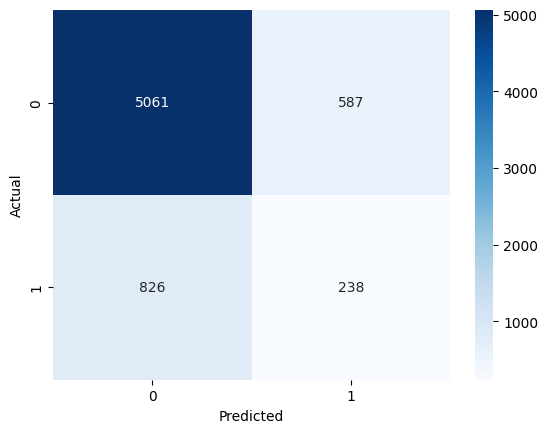

In [256]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [258]:
pit_stops = pd.read_csv("../data/pitStops.csv")  # adjust name if different
pit_stops.head()


FileNotFoundError: [Errno 2] No such file or directory: '../data/pitStops.csv'

In [259]:
# Example: assume short races → 1-stop, long races → 2-stop
# We'll use race_round as a proxy for race length (just for demonstration)

merged_df['pit_stop_count'] = merged_df['race_round'].apply(lambda x: 1 if x < 10 else 2)


In [268]:
merged_df[['race_round', 'pit_stop_count']].head(10)


,race_round,pit_stop_count
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,2,1
9,2,1


In [272]:
# Simplified proxy for pit stops: 1-stop for short races, 2-stop for longer races
merged_df['pit_stop_count'] = merged_df['race_round'].apply(lambda x: 1 if x < 10 else 2)

# Check
merged_df[['race_round', 'pit_stop_count']].head(10)


,race_round,pit_stop_count
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,2,1
9,2,1


In [279]:
# Features (pre-race info only)
features = ["circuit_name", "circuit_country", "year", "driverId"]
X = merged_df[features]
y = merged_df["pit_stop_count"]

# Encode categorical columns
X_encoded = pd.get_dummies(X, columns=["circuit_name", "circuit_country"])


In [282]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((26848, 113), (6712, 113), (26848,), (6712,))

In [281]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)


In [283]:
!python -m pip install matplotlib seaborn



[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [286]:
import matplotlib.pyplot as plt
import seaborn as sns


In [288]:
import matplotlib
import seaborn
print("matplotlib version:", matplotlib.__version__)
print("seaborn version:", seaborn.__version__)


matplotlib version: 3.10.8
seaborn version: 0.13.2


Accuracy: 0.9994040524433849

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      4180
           2       1.00      1.00      1.00      2532

    accuracy                           1.00      6712
   macro avg       1.00      1.00      1.00      6712
weighted avg       1.00      1.00      1.00      6712



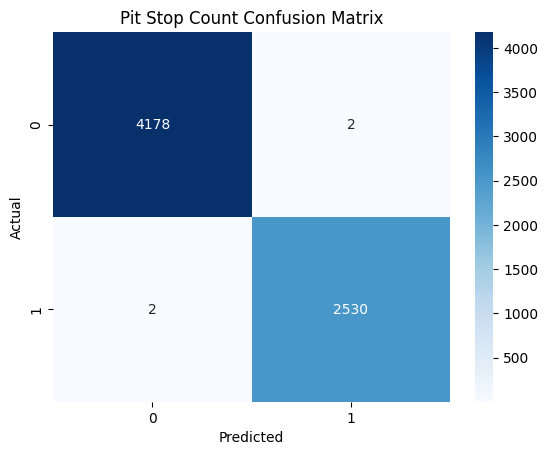

In [289]:
# -----------------------------
# Pit Stop Count Prediction
# -----------------------------

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1️⃣ Load & Prepare Data ---
driver_grid = pd.read_csv("../data/driverGrid.csv")
circuits = pd.read_csv("../data/circuits.csv")

# Merge relevant columns
driver_grid = driver_grid[["raceId", "driverId", "position"]]
circuits = circuits[["raceId", "circuit_name", "circuit_country", "year", "race_round"]]
merged_df = pd.merge(driver_grid, circuits, on="raceId", how="inner")

# --- 2️⃣ Create Simplified Pit Stop Count Target ---
merged_df['pit_stop_count'] = merged_df['race_round'].apply(lambda x: 1 if x < 10 else 2)

# --- 3️⃣ Prepare Features & Target ---
features = ["circuit_name", "circuit_country", "year", "driverId"]
X = merged_df[features]
y = merged_df["pit_stop_count"]

# Encode categorical features
X_encoded = pd.get_dummies(X, columns=["circuit_name", "circuit_country"])

# --- 4️⃣ Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# --- 5️⃣ Train Random Forest Classifier ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# --- 6️⃣ Predict & Evaluate ---
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Pit Stop Count Confusion Matrix")
plt.show()


In [290]:
# Simplified: simulate pit lap based on pit_stop_count
# 1-stop → pit around lap 15–25
# 2-stop → pit1 around 10–20, pit2 around 30–40
import numpy as np

def simulate_pit_lap(row):
    if row['pit_stop_count'] == 1:
        return np.random.randint(15, 26)
    else:  # 2-stop
        # For simplicity, just predict first pit lap
        return np.random.randint(10, 21)

merged_df['pit_lap'] = merged_df.apply(simulate_pit_lap, axis=1)
merged_df[['pit_stop_count', 'pit_lap']].head(10)


,pit_stop_count,pit_lap
0,1,15
1,1,17
2,1,19
3,1,15
4,1,15
5,1,21
6,1,19
7,1,18
8,1,22
9,1,15


In [291]:
# Features: same pre-race info
X = merged_df[["circuit_name", "circuit_country", "year", "driverId"]]
y_lap = merged_df["pit_lap"]

# Encode categorical features
X_encoded = pd.get_dummies(X, columns=["circuit_name", "circuit_country"])


In [292]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_lap, test_size=0.2, random_state=42
)


In [293]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Predict
y_pred = rf_reg.predict(X_test)


In [294]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 3.0026083953789557
MSE: 12.90596025803057
R2 Score: 0.19153410810427085


In [295]:
import numpy as np

# Simplified: assign tires based on pit_stop_count (demo only)
def simulate_tire(row):
    if row['pit_stop_count'] == 1:
        return np.random.choice(['Medium', 'Hard'])
    else:
        return np.random.choice(['Soft', 'Medium', 'Hard'])

merged_df['next_tire'] = merged_df.apply(simulate_tire, axis=1)
merged_df[['pit_stop_count', 'next_tire']].head(10)


,pit_stop_count,next_tire
0,1,Hard
1,1,Hard
2,1,Medium
3,1,Hard
4,1,Hard
5,1,Hard
6,1,Hard
7,1,Medium
8,1,Medium
9,1,Hard


In [296]:
# Features: same pre-race info
X = merged_df[["circuit_name", "circuit_country", "year", "driverId"]]
y_tire = merged_df["next_tire"]

# Encode categorical features (features)
X_encoded = pd.get_dummies(X, columns=["circuit_name", "circuit_country"])

# Encode target (tire) → Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y_tire)


In [297]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [298]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

rf_tire = RandomForestClassifier(n_estimators=100, random_state=42)
rf_tire.fit(X_train, y_train)

# Predict
y_pred = rf_tire.predict(X_test)


Accuracy: 0.4420441001191895

Classification Report:
               precision    recall  f1-score   support

        Hard       0.46      0.46      0.46      2937
      Medium       0.45      0.46      0.45      2921
        Soft       0.33      0.32      0.33       854

    accuracy                           0.44      6712
   macro avg       0.42      0.41      0.41      6712
weighted avg       0.44      0.44      0.44      6712



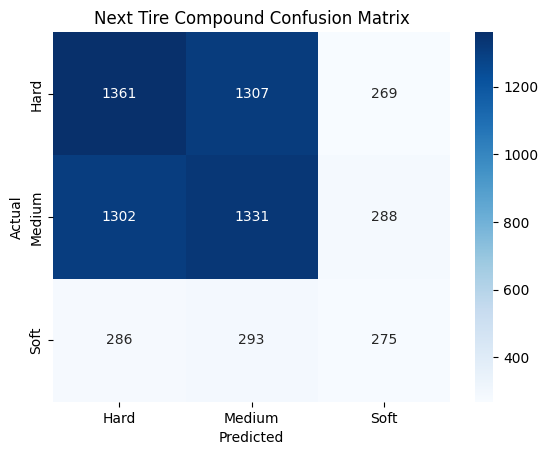

In [299]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Next Tire Compound Confusion Matrix")
plt.show()
